## Теорема Баеса

In [5]:
import torch
import torchvision

In [6]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze()

In [7]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [8]:
mnist_train[0]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0.,

In [9]:
mnist_train[0][0].shape

torch.Size([784])

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
mnist_train[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

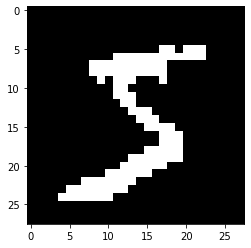

In [12]:
plt.imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)


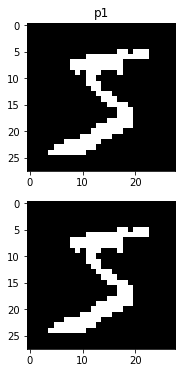

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(9,6))
axs[0].imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
axs[0].set_title("p1")
axs[1].imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
plt.show()

## Практика - реализуйте сами (без использования SKLEARN) наивный баесовский классификатор для этой задачи

In [14]:
onetwo = []
for rec in mnist_train:
    if rec[1] == 1 or rec[1] == 2:
        onetwo.append(rec)
        
len(onetwo)

12700

In [15]:
trainlen = len(onetwo)
trainlen

12700

In [16]:
piclen = len(onetwo[0][0])
piclen

784

In [17]:
count12 = [0, 0, 0]
p12 = [0, 0, 0]
pw01_12 = [[[0 for i in range(piclen)] for j in range(2)] for k in range(3)]
pw01 = [[0 for i in range(piclen)] for j in range(2)]

for rec in onetwo:
    count12[rec[1]] += 1
    for x in range(0,piclen):
        pw01_12[int(rec[1])] [int(rec[0][x])] [x] += 1
        pw01[int(rec[0][x])] [x] += 1

p12[1] = count12[1] / trainlen
p12[2] = count12[2] / trainlen

for x in range(0,piclen):
    pw01_12[1][0][x] /= count12[1]
    pw01_12[1][1][x] /= count12[1]
    pw01_12[2][0][x] /= count12[2]
    pw01_12[2][1][x] /= count12[2]
    if pw01[0][x] == 0:
        pw01[0][x] = 1/trainlen
    if pw01[1][x] == 0:
        pw01[1][x] = 1/trainlen
    pw01[0][x] /= trainlen
    pw01[1][x] /= trainlen
   

In [18]:
onetwo_test = []
for rec in mnist_test:
    if rec[1] == 1 or rec[1] == 2:
        onetwo_test.append(rec)
        
len(onetwo_test)

2167

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Number of fails: 64


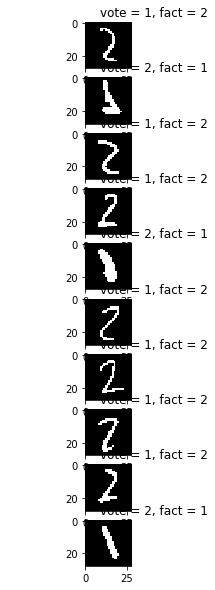

In [22]:
p = [0, 0, 0]
fails = 0
npics = 10
fig, axs = plt.subplots(npics, 1, figsize=(20,10))

for rec in onetwo_test:
    mul_pw01_12 = [1, 1, 1]
    mul_pw01 = 1
    for x in range(piclen):
        mul_pw01_12[1] *= pw01_12[1] [int(rec[0][x])] [x]
        mul_pw01_12[2] *= pw01_12[2] [int(rec[0][x])] [x]
        mul_pw01 *= pw01[int(rec[0][x])] [x]
        
    p[1] = mul_pw01_12[1] * p12[1] / mul_pw01
    p[2] = mul_pw01_12[2] * p12[2] / mul_pw01
    
    #print(f'{p[1]}\t{p[2]}\t{rec[1]}')
    if p[1] > p[2]:
        vote = 1
    else:
        vote = 2
     
    if vote != rec[1]:
        fails += 1
        if npics > 0:
            axs[npics-1].imshow(rec[0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
            axs[npics-1].set_title(f'                        vote = {vote}, fact = {rec[1]}')
            #print (f'vote = {vote}, fact = {rec[1]}')
            npics -= 1
        
    #print (f'{vote} {rec[1]}')
    
print (f'Number of fails: {fails}')

plt.show()

In [21]:
print ( 1- 64/2167)

0.970466082141209
